In [1]:
#打开数据集
import numpy as np
import scipy.io as scio
import matplotlib as mpl
import matplotlib.pyplot as plt

file_path ="C:/Users/70951/Desktop/mnist-original.mat"
mnist = scio.loadmat(file_path)
mnist.keys()

#数据整理
X, y = mnist["data"], mnist["label"]
X = X.transpose()
X.shape
y = y.transpose()
y.shape
y = y.astype(np.uint8)
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]
y_train=y_train.ravel()
y_test=y_test.ravel()

In [8]:
# 随机森林模型

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
forest_clf = RandomForestClassifier(n_estimators=100, max_leaf_nodes=180, random_state=405)
forest_clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=180, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=405,
                       verbose=0, warm_start=False)

In [9]:
#验证
cross_val_score(forest_clf, X_train, y_train, cv=3, scoring="accuracy")# 每一次验证的正确概率输出

array([0.9289 , 0.92275, 0.9309 ])

Text(0.5, 1.0, 'Random Forest:Confusion_matrix')

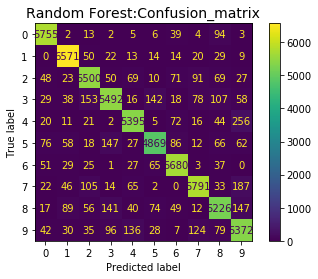

In [10]:
y_train_pred = cross_val_predict(forest_clf, X_train, y_train, cv=3) #使用交叉验证输出预测值
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx_display = ConfusionMatrixDisplay(conf_mx, display_labels='0123456789')
conf_mx_display.plot(values_format='.4g')
plt.title("Random Forest:Confusion_matrix", fontsize=14)

In [11]:
#Grid寻优
from sklearn.model_selection import GridSearchCV
param_grid = [{'n_estimators': [10, 50, 100], 'max_leaf_nodes': [20, 60, 100, 140, 180]}]
forest_clf = RandomForestClassifier(random_state=405)
grid_search = GridSearchCV(forest_clf, param_grid, cv=3, verbose=3, scoring='roc_auc_ovo')
grid_search.fit(X_train, y_train.ravel())

Fitting 3 folds for each of 15 candidates, totalling 45 fits
[CV] max_leaf_nodes=20, n_estimators=10 ..............................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .. max_leaf_nodes=20, n_estimators=10, score=0.965, total=   1.9s
[CV] max_leaf_nodes=20, n_estimators=10 ..............................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.8s remaining:    0.0s


[CV] .. max_leaf_nodes=20, n_estimators=10, score=0.968, total=   1.4s
[CV] max_leaf_nodes=20, n_estimators=10 ..............................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.2s remaining:    0.0s


[CV] .. max_leaf_nodes=20, n_estimators=10, score=0.971, total=   1.5s
[CV] max_leaf_nodes=20, n_estimators=50 ..............................
[CV] .. max_leaf_nodes=20, n_estimators=50, score=0.978, total=   5.8s
[CV] max_leaf_nodes=20, n_estimators=50 ..............................
[CV] .. max_leaf_nodes=20, n_estimators=50, score=0.979, total=   5.9s
[CV] max_leaf_nodes=20, n_estimators=50 ..............................
[CV] .. max_leaf_nodes=20, n_estimators=50, score=0.980, total=   5.7s
[CV] max_leaf_nodes=20, n_estimators=100 .............................
[CV] . max_leaf_nodes=20, n_estimators=100, score=0.980, total=  11.2s
[CV] max_leaf_nodes=20, n_estimators=100 .............................
[CV] . max_leaf_nodes=20, n_estimators=100, score=0.980, total=  11.7s
[CV] max_leaf_nodes=20, n_estimators=100 .............................
[CV] . max_leaf_nodes=20, n_estimators=100, score=0.981, total=  11.9s
[CV] max_leaf_nodes=60, n_estimators=10 ..............................
[CV] .

[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:  6.4min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=405,
                                 

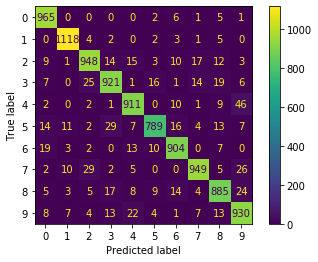

In [15]:
#验证测试集
forest_clf = RandomForestClassifier(n_estimators=100, max_leaf_nodes=180, random_state=405)
forest_clf.fit(X_train, y_train)
y_test_pred = forest_clf.predict(X_test)
conf_mx = confusion_matrix(y_test, y_test_pred)
conf_mx_display = ConfusionMatrixDisplay(conf_mx, display_labels='0123456789')
conf_mx_display.plot(values_format='.4g')